In [138]:
%matplotlib notebook
%matplotlib inline

In [139]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import shapiro
import seaborn as sns #Visualization
from matplotlib.lines import Line2D # for the legend

In [140]:
# Read CSV
csvpath = "datasets/census.csv"
census_df = pd.read_csv(csvpath,index_col="datapoint")
census_df["Zipcode"] = census_df["Zipcode"].astype("category")
census_df

,Year,Zipcode,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,Median Income,Median Rent,Median Home Value,County,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value
datapoint,,,,,,,,,,,,,,,,,
0,2011,48009,20037.0,18531.0,753.0,10033.0,437.0,809.0,786.0,0.0,100473.0,1056.0,342600.0,Oakland,136100.560801,1430.455866,464085.397374
1,2012,48009,20153.0,18622.0,663.0,10031.0,489.0,797.0,767.0,0.0,100789.0,993.0,339600.0,Oakland,133760.507147,1317.844046,450694.701081
2,2013,48009,20241.0,18620.0,765.0,10138.0,553.0,704.0,669.0,0.0,98750.0,1070.0,347400.0,Oakland,129162.560043,1399.533562,454390.616294
3,2014,48009,20382.0,18775.0,722.0,10510.0,467.0,654.0,582.0,16.0,107161.0,1124.0,371100.0,Oakland,137926.513171,1446.696100,477641.390410
4,2015,48009,20489.0,18864.0,587.0,10669.0,407.0,827.0,730.0,37.0,108135.0,1121.0,410700.0,Oakland,139015.137184,1441.124232,527983.694840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,2016,49548,31938.0,23352.0,3422.0,15880.0,1157.0,6463.0,3915.0,896.0,43343.0,664.0,80200.0,Kent,55026.306674,842.984280,101818.281967
1386,2017,49548,32694.0,23495.0,3522.0,16310.0,963.0,6656.0,4210.0,932.0,45534.0,695.0,82200.0,Kent,56602.075995,863.935583,102180.582572
1387,2018,49548,33303.0,23837.0,3633.0,17019.0,897.0,6401.0,4149.0,826.0,48314.0,724.0,89500.0,Kent,58625.894252,878.526875,108602.424464


In [141]:
# Create column in DF for ratios of White/Black population and poverty counts AND employed / unemployed
for i in census_df.index:
    census_df.at[i,"% Black Population"] = 100*(census_df.at[i,"Black Population"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% White Population"] = 100*(census_df.at[i,"White Population"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% Unemployed"]       = 100*(census_df.at[i,"Unemployed Count"] / census_df.at[i,"Total Population"])
    census_df.at[i, "% Black Poverty"]   = 100*(census_df.at[i,"Poverty Count - Black"] / census_df.at[i,"Total Population"])
    census_df.at[i, "% White Poverty"]   = 100*(census_df.at[i,"Poverty Count - White"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% Poverty"]       = 100*(census_df.at[i,"Poverty Count"] / census_df.at[i,"Total Population"])
census_df = census_df.drop(columns=["Median Home Value","Median Income","Median Rent"])
census_df


,Year,Zipcode,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,County,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty,% Poverty
datapoint,,,,,,,,,,,,,,,,,,,,
0,2011,48009,20037.0,18531.0,753.0,10033.0,437.0,809.0,786.0,0.0,Oakland,136100.560801,1430.455866,464085.397374,3.758048,92.483905,2.180965,0.000000,3.922743,4.037531
1,2012,48009,20153.0,18622.0,663.0,10031.0,489.0,797.0,767.0,0.0,Oakland,133760.507147,1317.844046,450694.701081,3.289833,92.403116,2.426438,0.000000,3.805885,3.954746
2,2013,48009,20241.0,18620.0,765.0,10138.0,553.0,704.0,669.0,0.0,Oakland,129162.560043,1399.533562,454390.616294,3.779458,91.991502,2.732078,0.000000,3.305173,3.478089
3,2014,48009,20382.0,18775.0,722.0,10510.0,467.0,654.0,582.0,16.0,Oakland,137926.513171,1446.696100,477641.390410,3.542341,92.115592,2.291237,0.078501,2.855461,3.208714
4,2015,48009,20489.0,18864.0,587.0,10669.0,407.0,827.0,730.0,37.0,Oakland,139015.137184,1441.124232,527983.694840,2.864952,92.068915,1.986432,0.180585,3.562887,4.036312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,2016,49548,31938.0,23352.0,3422.0,15880.0,1157.0,6463.0,3915.0,896.0,Kent,55026.306674,842.984280,101818.281967,10.714509,73.116664,3.622644,2.805436,12.258125,20.236082
1386,2017,49548,32694.0,23495.0,3522.0,16310.0,963.0,6656.0,4210.0,932.0,Kent,56602.075995,863.935583,102180.582572,10.772619,71.863339,2.945495,2.850676,12.876980,20.358476
1387,2018,49548,33303.0,23837.0,3633.0,17019.0,897.0,6401.0,4149.0,826.0,Kent,58625.894252,878.526875,108602.424464,10.908927,71.576134,2.693451,2.480257,12.458337,19.220491


In [142]:
# Create separate DFs for each county
oakland_data = pd.DataFrame(census_df.loc[census_df["County"] == "Oakland"])
kent_data = pd.DataFrame(census_df.loc[census_df["County"] == "Kent"])
saginaw_data = pd.DataFrame(census_df.loc[census_df["County"] == "Saginaw"])
muskegon_data = pd.DataFrame(census_df.loc[census_df["County"] == "Muskegon"])

# Ensure zipcodes are categorical
oakland_data["Zipcode"] = oakland_data["Zipcode"].astype("object")
kent_data["Zipcode"] = kent_data["Zipcode"].astype("object")
saginaw_data["Zipcode"] = saginaw_data["Zipcode"].astype("object")
muskegon_data["Zipcode"] = muskegon_data["Zipcode"].astype("object")

# Export separate dataframes for use in Map Plots ipynb 
oakland_data.to_csv("datasets/oakland_data.csv",index_label="datapoint")
kent_data.to_csv("datasets/kent_data.csv",index_label="datapoint")
saginaw_data.to_csv("datasets/saginaw_data.csv",index_label="datapoint")
muskegon_data.to_csv("datasets/muskegon_data.csv",index_label="datapoint")

In [143]:
# Determine if any of the datasets are normally distributed
oakland_shapiro_df = pd.DataFrame({"Total Population": [shapiro(oakland_data["Total Population"])],
                                   "Adjusted Median Income": [shapiro(oakland_data["Adjusted Median Income"])] ,
                                   "Adjusted Median Rent": [shapiro(oakland_data["Adjusted Median Rent"])] ,
                                   "Adjusted Median Home Value": [shapiro(oakland_data["Adjusted Median Home Value"])] ,
                                   "% Black Population": [shapiro(oakland_data["% Black Population"])] ,
                                   "% White Population": [shapiro(oakland_data["% White Population"])] ,
                                   "% Unemployed": [shapiro(oakland_data["% Unemployed"])] , 
                                   "% Black Poverty":  [shapiro(oakland_data["% Black Poverty"])],
                                   "% White Poverty": [shapiro(oakland_data["% White Poverty"])]
                                  })
oakland_shapiro_df

## None of the p values (second number) are over .05, so the data does not come from a normal distribution

,Total Population,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
0,"(0.9829899072647095, 6.007644515193533e-07)","(0.9850980043411255, 2.902014557548682e-06)","(0.9205532670021057, 3.779508159943604e-18)","(0.9804565906524658, 1.0333688749142311e-07)","(0.6024347543716431, 2.7348503136127723e-36)","(0.798740565776825, 8.18224692414609e-28)","(0.9170214533805847, 1.4935285694994606e-18)","(0.5419737100601196, 3.3544352703930687e-38)","(0.8887209296226501, 2.1285524067232736e-21)"


In [144]:
# Determine if any of the datasets are normally distributed
saginaw_shapiro_df = pd.DataFrame({"Total Population": [shapiro(saginaw_data["Total Population"])],
                                   "Adjusted Median Income": [shapiro(saginaw_data["Adjusted Median Income"])] ,
                                   "Adjusted Median Rent": [shapiro(saginaw_data["Adjusted Median Rent"])] ,
                                   "Adjusted Median Home Value": [shapiro(saginaw_data["Adjusted Median Home Value"])] ,
                                   "% Black Population": [shapiro(saginaw_data["% Black Population"])] ,
                                   "% White Population": [shapiro(saginaw_data["% White Population"])] ,
                                   "% Unemployed": [shapiro(saginaw_data["% Unemployed"])] , 
                                   "% Black Poverty":  [shapiro(saginaw_data["% Black Poverty"])],
                                   "% White Poverty": [shapiro(saginaw_data["% White Poverty"])]
                                  })
saginaw_shapiro_df
## None of the p values (second number) are over .05, so the data does not come from a normal distribution

,Total Population,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
0,"(0.7898409366607666, 1.2240425971476979e-17)","(0.9703397750854492, 4.526933844317682e-05)","(0.9724915027618408, 9.222286462318152e-05)","(0.9772341251373291, 0.00048489286564290524)","(0.5146527886390686, 1.0299066609047832e-25)","(0.5821050405502319, 3.767682908161053e-24)","(0.957460343837738, 9.98706127575133e-07)","(0.4688122868537903, 1.1083906326619359e-26)","(0.9448896646499634, 4.2531048904947966e-08)"


In [145]:
# Determine if any of the datasets are normally distributed
kent_shapiro_df = pd.DataFrame({"Total Population": [shapiro(kent_data["Total Population"])],
                                   "Adjusted Median Income": [shapiro(kent_data["Adjusted Median Income"])] ,
                                   "Adjusted Median Rent": [shapiro(kent_data["Adjusted Median Rent"])] ,
                                   "Adjusted Median Home Value": [shapiro(kent_data["Adjusted Median Home Value"])] ,
                                   "% Black Population": [shapiro(kent_data["% Black Population"])] ,
                                   "% White Population": [shapiro(kent_data["% White Population"])] ,
                                   "% Unemployed": [shapiro(kent_data["% Unemployed"])] , 
                                   "% Black Poverty":  [shapiro(kent_data["% Black Poverty"])],
                                   "% White Poverty": [shapiro(kent_data["% White Poverty"])]
                                  })
kent_shapiro_df
## None of the p values (second number) are over .05, so the data does not come from a normal distribution

,Total Population,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
0,"(0.9562539458274841, 5.295288119100405e-08)","(0.8821706771850586, 1.0383887014673611e-14)","(0.8965504765510559, 1.0696739988994702e-13)","(0.924335777759552, 1.9952393903732712e-11)","(0.727453351020813, 3.379025986520897e-22)","(0.8154786825180054, 1.6551756878166904e-18)","(0.9685501456260681, 2.8070242024114123e-06)","(0.6752191781997681, 5.652424255319211e-24)","(0.9480528831481934, 5.3182627191006304e-09)"


In [146]:
# Determine if any of the datasets are normally distributed
muskegon_shapiro_df = pd.DataFrame({"Total Population": [shapiro(muskegon_data["Total Population"])],
                                   "Adjusted Median Income": [shapiro(muskegon_data["Adjusted Median Income"])] ,
                                   "Adjusted Median Rent": [shapiro(muskegon_data["Adjusted Median Rent"])] ,
                                   "Adjusted Median Home Value": [shapiro(muskegon_data["Adjusted Median Home Value"])] ,
                                   "% Black Population": [shapiro(muskegon_data["% Black Population"])] ,
                                   "% White Population": [shapiro(muskegon_data["% White Population"])] ,
                                   "% Unemployed": [shapiro(muskegon_data["% Unemployed"])] , 
                                   "% Black Poverty":  [shapiro(muskegon_data["% Black Poverty"])],
                                   "% White Poverty": [shapiro(muskegon_data["% White Poverty"])]
                                  })
muskegon_shapiro_df
## None of the p values (second number) are over .05, so the data does not come from a normal distribution

,Total Population,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
0,"(0.7885712385177612, 6.177828431111476e-13)","(0.8885276913642883, 7.773440557912181e-09)","(0.8629674315452576, 4.62798022127231e-10)","(0.9864739179611206, 0.18642888963222504)","(0.6557303071022034, 1.1760978357243075e-16)","(0.7016914486885071, 1.6510438205681339e-15)","(0.9602880477905273, 0.00044368684757500887)","(0.7216531038284302, 5.704569964597476e-15)","(0.8721967935562134, 1.2289045336899562e-09)"


In [147]:
# Create summary statistics table with stats for each county (mean / median of each column)
summary_stats = census_df.describe()
summary_stats = summary_stats.drop(columns=['Year'])
summary_stats

,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty,% Poverty
count,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000
mean,17187.082353,13484.029412,2125.040441,8276.280147,695.282353,2064.556618,1298.362500,519.939706,83382.182609,958.134575,219537.124167,9.687709,82.623644,4.009510,2.329347,7.859173,11.384531
std,10634.574729,8382.766856,3894.143526,5199.550196,626.228710,2455.044646,1246.895574,1187.525253,31371.256134,305.237727,104078.651190,16.534546,18.795341,2.013641,4.738871,4.477818,7.971852
min,723.000000,215.000000,0.000000,243.000000,5.000000,23.000000,18.000000,0.000000,17716.687710,384.868855,47236.765666,0.000000,16.475096,0.490677,0.000000,1.167945,1.417993
25%,7822.500000,6378.500000,79.000000,3535.750000,243.500000,598.000000,479.000000,7.000000,61908.860489,730.968474,145582.332092,0.828198,76.625414,2.458428,0.056761,4.542065,5.885375
50%,16588.000000,12622.000000,495.500000,8084.000000,517.500000,1118.000000,854.000000,52.000000,75729.732809,898.284209,195376.242607,3.151859,90.346356,3.607736,0.406027,6.814730,9.374404
75%,24688.250000,19977.000000,1971.500000,11890.000000,953.250000,2463.000000,1726.750000,417.000000,98728.577370,1109.234063,274971.314703,9.459179,95.524243,5.229873,2.183649,10.147895,14.264322
max,44041.000000,35837.000000,23912.000000,22923.000000,4135.000000,15059.000000,7175.000000,10828.000000,191439.077241,2377.875837,645380.854035,77.088452,99.413834,12.987433,39.267677,27.937916,51.830808


In [148]:
Saginaw_df = census_df.loc[census_df['County'] == 'Saginaw']
saginaw_summary = Saginaw_df.describe()
saginaw_summary = saginaw_summary.drop(columns=['Year'])
# saginaw_summary

In [149]:
kent_df = census_df.loc[census_df['County'] == 'Kent']
kent_summary = kent_df.describe()
kent_summary = kent_summary.drop(columns=['Year'])
# kent_summary

In [150]:
Oakland_df = census_df.loc[census_df['County'] == 'Oakland']
oakland_summary = Oakland_df.describe()
oakland_summary = oakland_summary.drop(columns=['Year'])
# oakland_summary

In [151]:
muskegon_df = census_df.loc[census_df['County'] == 'Muskegon']
muskegon_summary = muskegon_df.describe()
muskegon_summary = muskegon_summary.drop(columns=['Year'])
# muskegon_summary

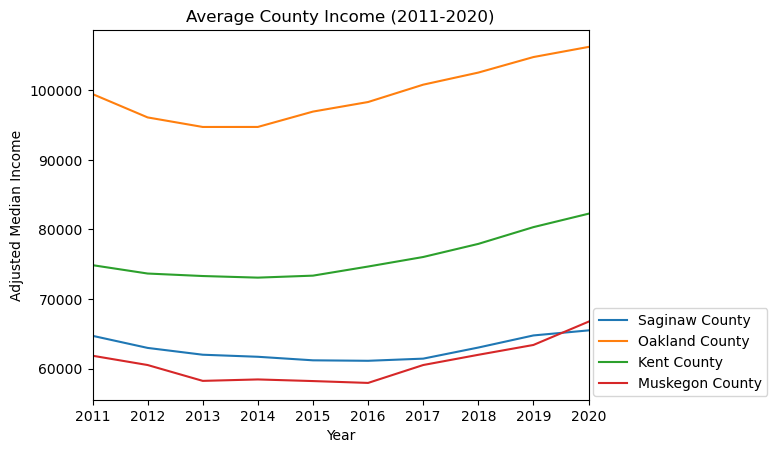

In [152]:
saginaw_county_median_income = Saginaw_df.groupby('Year')['Adjusted Median Income'].mean()
oakland_county_median_income = Oakland_df.groupby('Year')['Adjusted Median Income'].mean()
kent_county_median_income = kent_df.groupby('Year')['Adjusted Median Income'].mean()
muskegon_county_median_income = muskegon_df.groupby('Year')['Adjusted Median Income'].mean()

plt.plot(saginaw_county_median_income, label="Saginaw County")
plt.plot(oakland_county_median_income, label="Oakland County")
plt.plot(kent_county_median_income, label="Kent County")
plt.plot(muskegon_county_median_income, label="Muskegon County")
plt.legend(loc=(1.01,0.01))
plt.xlabel('Year')
plt.ylabel('Adjusted Median Income')
plt.title('Average County Income (2011-2020)')
plt.xlim(2011,2020)

plt.savefig("datasets/county_average_rent")


## Geoview Maps 


In [153]:
# Import dependencies
import requests
import json
import pandas as pd
import hvplot.pandas
import cartopy
import geoviews as gv
from config_1 import geoapify_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")


In [154]:
# Import Data and move index back
oakland_data = pd.read_csv("datasets/oakland_data.csv",index_col="datapoint")
kent_data    = pd.read_csv("datasets/kent_data.csv"   ,index_col="datapoint")
saginaw_data = pd.read_csv("datasets/saginaw_data.csv",index_col="datapoint")
muskegon_data = pd.read_csv("datasets/muskegon_data.csv",index_col="datapoint")

oakland_data["Lat"] = 0.1
oakland_data["Lon"] = 0.1
saginaw_data["Lat"] = 0.1
saginaw_data["Lon"] = 0.1
kent_data["Lat"] = 0.1
kent_data["Lon"] = 0.1
muskegon_data["Lat"] = 0.1
muskegon_data["Lon"] = 0.1

In [155]:
# Set up function for gathering coordinates for zipcodes
start_url = "https://api.geoapify.com/v1/geocode/search?text="
end_url =  "&lang=en&limit=1&type=postcode&filter=countrycode:us&apiKey="+geoapify_key
def get_coords(df):
    lons = [0]
    lats = [0]
    zips = [0]
    for zipcode in df["Zipcode"].unique():
        response = requests.get(start_url+str(zipcode)+end_url).json()
        lon = response["features"][0]["properties"]["lon"]
        lat = response["features"][0]["properties"]["lat"]
        lons.append(lon)
        lats.append(lat)
        zips.append(zipcode)

    temp_df = pd.DataFrame({"Zipcode":zips,"Lon":lons,"Lat":lats})
    for i in df.index:
        zipcode = df.at[i,"Zipcode"]
        zip_loc = temp_df.loc[temp_df["Zipcode"]== zipcode]
        df.at[i,"Lon"] = zip_loc["Lon"]
        df.at[i,"Lat"] = zip_loc["Lat"]

In [156]:
# Run function for each dataframe to gather the coordinates
get_coords(oakland_data)
get_coords(kent_data)
get_coords(saginaw_data)
get_coords(muskegon_data)

In [157]:
# Export to CSV to save the API
oakland_data.to_csv("datasets/oakland_latlon.csv",index_label = "datapoint")
saginaw_data.to_csv("datasets/saginaw_latlon.csv",index_label = "datapoint")
kent_data.to_csv("datasets/kent_latlon.csv",index_label = "datapoint")
muskegon_data.to_csv("datasets/muskegon_latlon.csv",index_label = "datapoint")

In [158]:
# Import CSVs to continue using data
oakland_final = pd.read_csv("datasets/oakland_latlon.csv",index_col="datapoint")
kent_final = pd.read_csv("datasets/kent_latlon.csv",index_col="datapoint")
saginaw_final = pd.read_csv("datasets/saginaw_latlon.csv",index_col="datapoint")
muskegon_final = pd.read_csv("datasets/muskegon_latlon.csv",index_col="datapoint")


In [159]:
oakland_final["% Poverty"] = 100*oakland_final["Poverty Count"]/oakland_final["Total Population"]
kent_final["% Poverty"] = 100*kent_final["Poverty Count"]/kent_final["Total Population"]
saginaw_final["% Poverty"] = 100*saginaw_final["Poverty Count"]/saginaw_final["Total Population"]
muskegon_final["% Poverty"] = 100*muskegon_final["Poverty Count"]/muskegon_final["Total Population"]


In [167]:
## Oakland County Average Median Income vs Years Geoview Maps & # Save Map Plot

for year in range(2011,2021):
    oakland_map_plot = oakland_final.hvplot.points(
        "Lon",
        "Lat",
        geo = True,
        tiles = "EsriStreet",
        frame_width = 700,
        frame_height = 500,
        size = "Adjusted Median Income",
        scale = .08,
        hover_cols = ["Zipcode"],
        clim = (0,150000),
        title = f"Oakland County {'Adjusted Median Income'}: {year}"
)
    
    hvplot.save(oakland_map_plot,"Oakland_Adjusted Median Income_{year}.png")


In [ ]:
## Kent County Average Median Income vs Years Geoview Maps # Save Map Plot

for year in range(2011,2021):
    kent_map_plot = kent_final.hvplot.points(
        "Lon",
        "Lat",
        geo = True,
        tiles = "EsriStreet",
        frame_width = 700,
        frame_height = 500,
        size = "Adjusted Median Income",
        scale = .08,
        hover_cols = ["Zipcode"],
        clim = (0,150000),
        title = f"Kent County {'Adjusted Median Income'}: {year}"
)
    
    hvplot.save(kent_map_plot,"Kent_Adjusted Median Income_{year}.png")
    

In [ ]:
## Saginaw County Average Median Income vs Years Geoview Maps # Save Map Plot

for year in range(2011,2021):
    saginaw_map_plot = saginaw_final.hvplot.points(
        "Lon",
        "Lat",
        geo = True,
        tiles = "EsriStreet",
        frame_width = 700,
        frame_height = 500,
        size = "Adjusted Median Income",
        scale = .08,
        hover_cols = ["Zipcode"],
        clim = (0,150000),
        title = f"Saginaw County {'Adjusted Median Income'}: {year}"
)
    
    hvplot.save(saginaw_map_plot,"Saginaw_Adjusted Median Income_{year}.png")